# 2020 COVID 19 Pandemic

# Background 
The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognised as a pandemic by the World Health Organization (WHO) on 11 March 2020.

The virus is typically spread from one person to another via respiratory droplets produced during coughing Primarily, it spreads when people are in close contact but it may also spread when one touches a contaminated surface and then their eyes, nose or mouth.It is most contagious when people are symptomatic, although spread may be possible before symptoms appear.


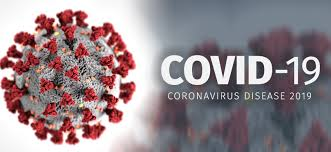

The White House Office of Science and Technology Policy (OSTP) pulled together a coalition research groups and companies (including Kaggle) to prepare the COVID-19 Open Research Dataset (CORD-19) to attempt to address key open scientific questions on COVID-19.

This is one of the two complementary forecasting tasks to predict COVID-19 spread. This task is based on various regions across the world

# Question we are Addressing

1. How is the growth of Number of cases ?
2. How is worst hit countires doing ?
3. is there any relationship between confirmed cases and death in worst hit countries ?
4. How overall World is doing ?
5. At last we will try to Forecast cases?

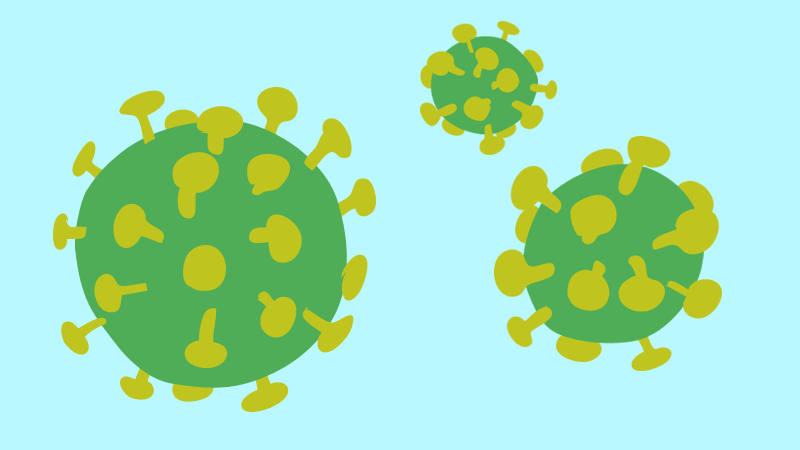

## References
https://www.kaggle.com/abhinand05/covid-19-digging-a-bit-deeper#1.-Confirmed-Cases-Over-Time

## Data and Modules

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import xgboost as xgb
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
train = pd.read_csv('../input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv(r'../input/covid19-global-forecasting-week-1/test.csv')
train.head()


In [ ]:
test.head()

In [ ]:
print("shape of train data is {}".format(train.shape))
print("shape of test data is {}".format(test.shape))

In [ ]:
# checking basic info for test and train
train.info()

In [ ]:
# Data missing information for train
data_info=pd.DataFrame(train.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(train.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(train.isnull().sum()/train.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

**Province/state has 54% missing value that we can understand which country provide state-wise information which country not**

In [ ]:
# Data missing information for test
data_info=pd.DataFrame(test.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(test.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(test.isnull().sum()/test.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

# Question 1 : How is growth in number of cases

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.date
confirmed_case = train.groupby('Date')['ConfirmedCases'].agg('sum')
Fatalities = train.groupby('Date')['Fatalities'].agg('sum')

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=train.Date,
                y=confirmed_case,
                name="Confirmed Case around the World",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=train.Date,
                y=Fatalities,
                name="Death around around the world",
                line_color='red',
                opacity=0.8))

fig.update_layout(title_text="Growth Number of cases of COVID 19 Around the world",template="plotly_dark")

fig.show()

**We can observe that from 8 March Onward Take firm grip around the world as we can see exponetial growth in Confirmed cases**

**But Total number of causlity point of view ,last week onward growth pick pace one major cause country like Italy,Iran etc..**

# Question 2 : Worst hit Countries and how they are doing ?

In [ ]:
confirmed_case_country =train.groupby('Country/Region')['ConfirmedCases'].agg('max').sort_values(ascending =False)[:15]
Fatalities_country = train.groupby('Country/Region')['Fatalities'].agg('max').sort_values(ascending =False)[:15]
frame = {'Country':confirmed_case_country.index,'Cases': confirmed_case_country }
CountryWise = pd.DataFrame(frame)
frame = {'Country':Fatalities_country.index,'Cases':Fatalities_country}
CountryWise_death = pd.DataFrame(frame)

In [ ]:
# Confirmed Cases analysis

fig = px.bar(CountryWise, x= 'Country', y='Cases',color='Cases',labels={'Country':'Confirmed Cases'},height=400,template="plotly_dark")
fig.show()

In [ ]:
# Death Cases analysis

fig = px.bar(CountryWise_death, x= 'Country', y='Cases',color='Cases',labels={'Country':'Death Cases'},height=400,template="plotly_dark")
fig.show()

**Apart from china where COVID 19 Originated,from Data We can say Europe hit worst in case of both Confirmed and Death cases**

**One More thing to be noted,Mostly Worst hit countires are developed**

## Let's more about Top Three Countries

In [ ]:
china = train.loc[train['Country/Region']=='China'].groupby('Date').agg('sum')
Italy = train.loc[train['Country/Region']=='Italy'].groupby('Date').agg('sum')
Iran = train.loc[train['Country/Region']=='Iran'].groupby('Date').agg('sum')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=china.index,
                y=china.ConfirmedCases,
                name="Confirmed Case in China",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=china.index,
                y=china.Fatalities,
                name="Death case in China",
                line_color='red',
                opacity=0.8))

fig.update_layout(title_text="View of china",template="plotly_dark")

fig.show()

**Good News For China !!!!As we can that After Feb 23 Number of Confirm case remain almost constant but parallely we can see increase death number of cases**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=Italy.index,
                y=Italy.ConfirmedCases,
                name="Confirmed Case in Italy",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Italy.index,
                y=Italy.Fatalities,
                name="Death case in Italy",
                line_color='red',
                opacity=0.8))

fig.update_layout(title_text="View of Italy",template="plotly_dark")

fig.show()

**Well !!! Italy Condition is far worse .. we can see exponential growth in total register case as well in number of death cases**

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=Iran.index,
                y=Iran.ConfirmedCases,
                name="Confirmed Case in Iran",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=Iran.index,
                y=Iran.Fatalities,
                name="Death case in Iran",
                line_color='red',
                opacity=0.8))

fig.update_layout(title_text="View of Iran",template="plotly_dark")

fig.show()

**Well !!! Iran Condition is also worse .. we can observe quardatic growth in total register case as well in number of death cases**

# Question 3 : How overall World is doing ?

In [ ]:
#train.drop('Proviance/state',axis=1,inplace = True)
train_country = train.groupby('Country/Region').agg('max')

In [ ]:
train_country

In [ ]:
fig = px.choropleth(train_country, locations=train_country.index, 
                    locationmode='country names', color="ConfirmedCases", 
                    hover_name="ConfirmedCases", range_color=[1,10000], 
                    color_continuous_scale="hot", 
                    title='Confimed Case around the world')

fig.update_layout(template="plotly_dark")

fig.show()





**White Colored County hit worst like China,Iran,Italy,USA**

In [ ]:
fig = px.choropleth(train_country, locations=train_country.index, 
                    locationmode='country names', color="Fatalities", 
                    hover_name="Fatalities", range_color=[1,2000], 
                    color_continuous_scale="hot", 
                    title='Death Case around the world')

fig.update_layout(template="plotly_dark")

fig.show()

# is there any relationship between confirmed cases and death in worst hit countries ?

In [ ]:
CountryWise['death_case'] = CountryWise_death['Cases'] 
print("Correlation between Confirmed cases and death cases in worst hit countires {:.2f}%".format(CountryWise.corr()['death_case'][0]*100))

**There is 88.02% realtionship between Confirmed cases and death case** 

In [ ]:
# Mean Confirmed Cases and Death Cases in Mainland China
print("Mean Confirmed Cases in world  {:.1f}".format(train_country['ConfirmedCases'].mean()))
print("Mean Confirmed Cases in world  {:.1f}".format(train_country['Fatalities'].mean()))
print("Total Death Rate in world is {:.1f}%".format((train_country['Fatalities'].mean()/train_country['ConfirmedCases'].mean())*100))

### Let's Check is there any Difference in mean after removing outlier such as (china,Italy,Iran)

In [ ]:
train_country_exclude_3 = train_country.loc[(train_country.index!='China') & (train_country.index!='Italy') & (train_country.index!= 'Iran')]

In [ ]:
# Mean Confirmed Cases and Death Cases in Mainland China
print("Mean Confirmed Cases in rest of world  {:.1f}".format(train_country_exclude_3['ConfirmedCases'].mean()))
print("Mean Confirmed Cases in rest of world  {:.1f}".format(train_country_exclude_3['Fatalities'].mean()))
print("Total Death Rate in rest of world is {:.1f}%".format((train_country_exclude_3['Fatalities'].mean()/train_country_exclude_3['ConfirmedCases'].mean())*100))

### Yes there is difference !! Still in world we have 2.5% Death rate after removing outlier. But We need to take precaution

# Forecasting Part

## Let's Do it for only for Italy 

In [ ]:
train_italy = train.loc[train['Country/Region']=='Italy']
train_italy = train_italy[['Date','ConfirmedCases']]
train_italy['Date'] = pd.to_datetime(train_italy['Date'])
train_italy.index = train_italy['Date']
train_italy.drop('Date',inplace=True,axis=1)

In [ ]:
train_italy

In [ ]:
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['Cases'] = df['ConfirmedCases']
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['quarter','month','year','dayofyear','dayofmonth','weekofyear','Cases']]
    return X

In [ ]:
train_italy = create_features(train_italy)
y = train_italy.pop('Cases')
x = train_italy
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print("shape of x train and y trains is {} {}".format(x_train.shape, y_train.shape))
print("shape of x test and y test is {} {}".format(x_test.shape, y_test.shape))

In [ ]:
reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=10,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=1000, #stop if 50 consequent rounds without decrease of error
        verbose=False) # Change verbose to True if you want to see it train

In [ ]:
xgb.plot_importance(reg, height=0.9)

In [ ]:
## Continue to Work 